# 합성곱 신경망 실습

### 랜덤 시드 설정

In [3]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

### 데이터 불러오기

In [4]:
from tensorflow.keras import datasets
(X_tn0, y_tn0), (X_te0, y_te0) = datasets.mnist.load_data()     # 트레이닝, 테스트 데이터 나눠서 불러오기

11501568/11490434 [==============================] - 1s 0us/step


### 오리지널 데이터 차원 확인

In [5]:
print(X_tn0.shape)

(60000, 28, 28)


In [6]:
print(y_tn0.shape)

(60000,)


In [7]:
print(X_te0.shape)

(10000, 28, 28)


In [8]:
print(y_te0.shape)

(10000,)


### 오리지널 데이터 시각화

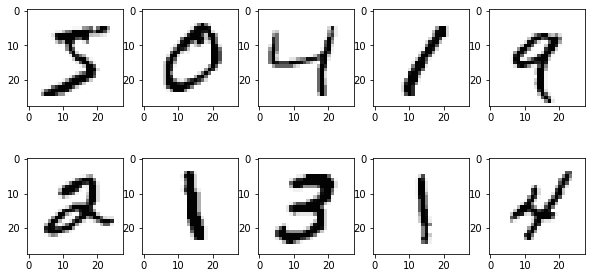

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_tn0[i].reshape((28, 28)),
              cmap = 'Greys')      # i 번째 데이터 시각화

### 타깃 클래스 확인

In [11]:
set(y_tn0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### 피처 데이터 스케일 조정

In [12]:
X_tn_re = X_tn0.reshape(60000, 28, 28, 1)       # CNN 인풋 데이터 조정 (데이터 수, 행, 열, 채널 수)
X_tn = X_tn_re/255                              # 최대값 1이 되도록 조정
print(X_tn.shape)

(60000, 28, 28, 1)


In [13]:
X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re/255
print(X_te.shape)

(10000, 28, 28, 1)


### 타깃 데이터 원-핫 인코딩

In [14]:
from tensorflow.keras.utils import to_categorical
y_tn = to_categorical(y_tn0)
y_te = to_categorical(y_te0)

### 합성곱 신경망 생성

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout

n_class = len(set(y_tn0))

model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5),        # 32: 아웃풋 데이터 차원
                input_shape = (28, 28, 1),
                padding = 'valid',               # 패딩 안함, ex) 'same'은 패딩을 통해 아웃풋 사이즈 인풋과 동일하게 유지
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size = (3, 3),
         padding = 'valid',
         activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 32)         

### 모형 컴파일

In [18]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

### 학습

In [19]:
hist = model.fit(X_tn, y_tn, epochs = 3, batch_size = 100)

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
600/600 [==============================] - 19s 30ms/step - loss: 0.2262 - accuracy: 0.9290
Epoch 2/3
600/600 [==============================] - 18s 30ms/step - loss: 0.0734 - accuracy: 0.9771
Epoch 3/3
600/600 [==============================] - 18s 30ms/step - loss: 0.0552 - accuracy: 0.9823


### 모형 평가

In [20]:
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0242 - accuracy: 0.9930
0.9930499792098999
313/313 [==============================] - 1s 4ms/step - loss: 0.0264 - accuracy: 0.9916
0.991599977016449


### 오답 데이터 확인

In [21]:
y_pred_hot = model.predict(X_te)
print(y_pred_hot[0])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[6.6058661e-08 5.1221610e-07 8.5989450e-06 3.1563854e-05 1.5012574e-08
 6.7577105e-08 1.1028717e-11 9.9994826e-01 3.8140976e-07 1.0438277e-05]


In [24]:
import numpy as np
y_pred = np.argmax(y_pred_hot, axis = 1)         # 원-핫 인코딩을 원래 숫자로
print(y_pred)

[7 2 1 ... 4 5 6]


In [26]:
diff = y_te0 - y_pred
diff_idx = []
y_len = len(y_te0)
for i in range(0, y_len):
    if(diff[i] !=  0):
        diff_idx.append(i)

### 오답 데이터 시각화

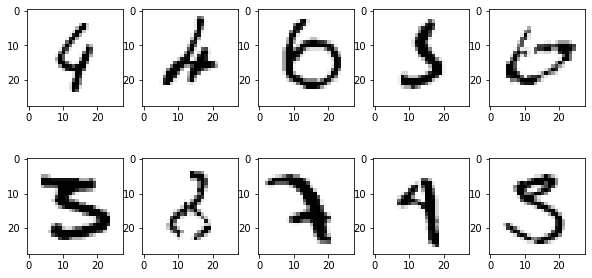

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    raw_idx = diff_idx[i]
    plt.imshow(X_te0[raw_idx].reshape((28, 28)),
              cmap = 'Greys')
plt.show()